In [1]:
pip install yellowbrick

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder
import os
import seaborn as sn
import matplotlib.pyplot as plt
import sys
import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import tensorflow as tf
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.feature_selection import mutual_info_classif
from yellowbrick.model_selection import RFECV
from sklearn.datasets import make_classification
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv
Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [6]:
df_train=pd.read_csv("SalaryData_Train(1).csv")
df_test=pd.read_csv("SalaryData_Test(1).csv")

In [13]:
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [15]:
df=df_train.append(df_test)
df.reset_index(inplace=True,drop=True)

In [16]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [17]:
df.shape

(45221, 14)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [21]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [22]:
df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [24]:
df[df.duplicated()].shape

(5982, 14)

In [25]:
df[df.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
45210,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
45213,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
45214,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K


In [26]:
df=df.drop_duplicates()

In [27]:
df.shape

(39239, 14)

In [28]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
df1 = df.copy()
cols = ['workclass','education','maritalstatus','occupation','relationship',
      'race','sex','native','Salary']
df1[cols] = df[cols].apply(LabelEncoder().fit_transform)

df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


age


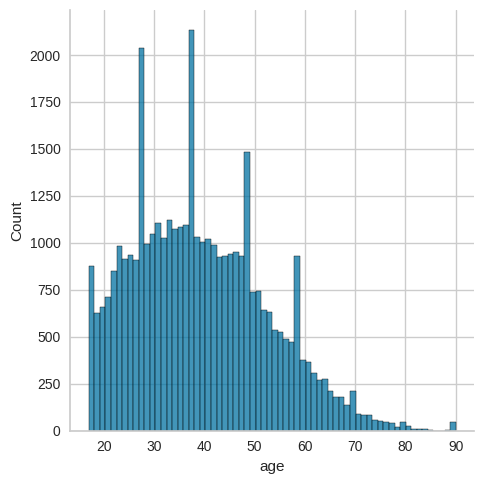

<Figure size 2000x1000 with 0 Axes>

workclass


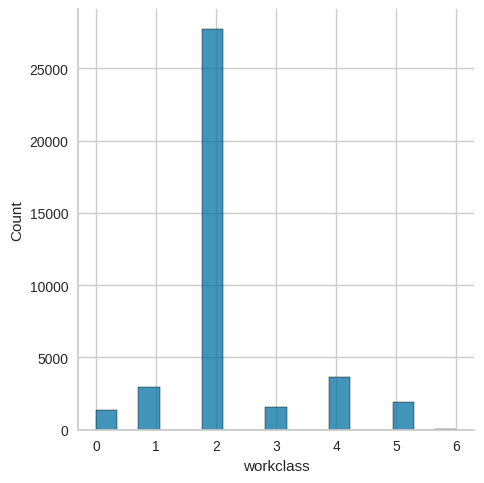

<Figure size 2000x1000 with 0 Axes>

education


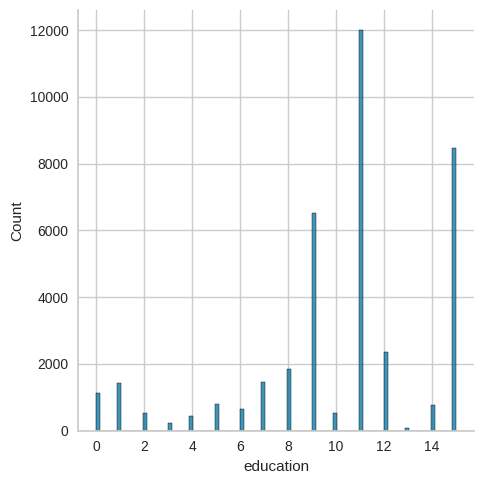

<Figure size 2000x1000 with 0 Axes>

educationno


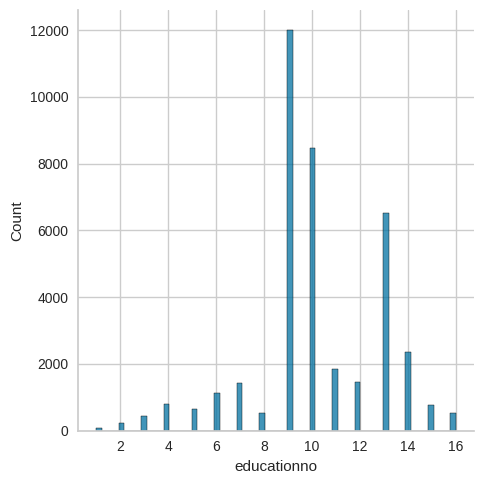

<Figure size 2000x1000 with 0 Axes>

maritalstatus


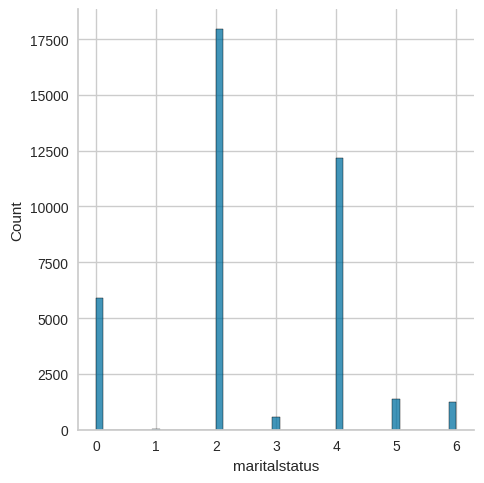

<Figure size 2000x1000 with 0 Axes>

occupation


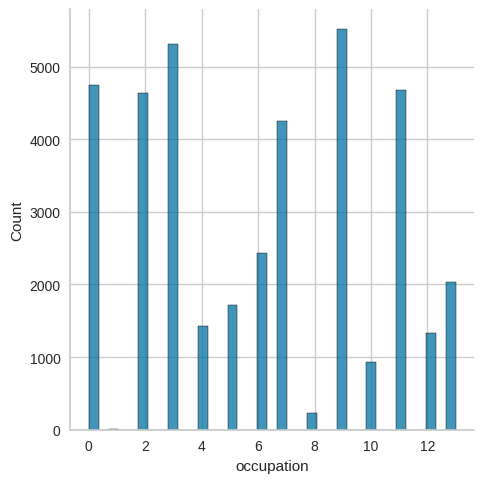

<Figure size 2000x1000 with 0 Axes>

relationship


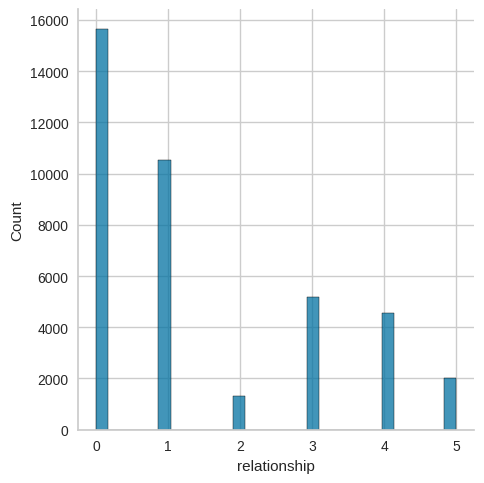

<Figure size 2000x1000 with 0 Axes>

race


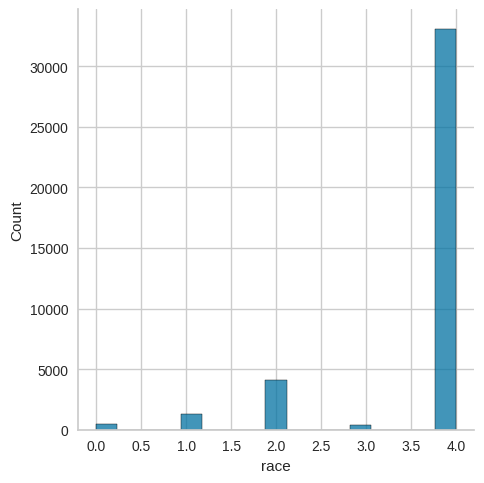

<Figure size 2000x1000 with 0 Axes>

sex


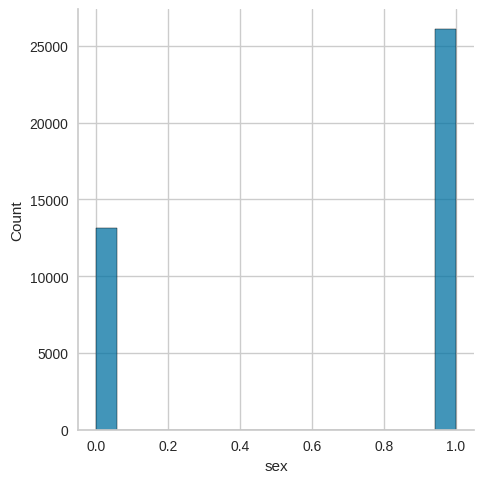

<Figure size 2000x1000 with 0 Axes>

capitalgain


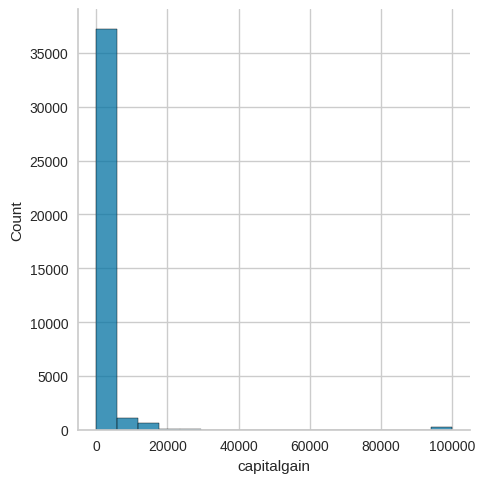

<Figure size 2000x1000 with 0 Axes>

capitalloss


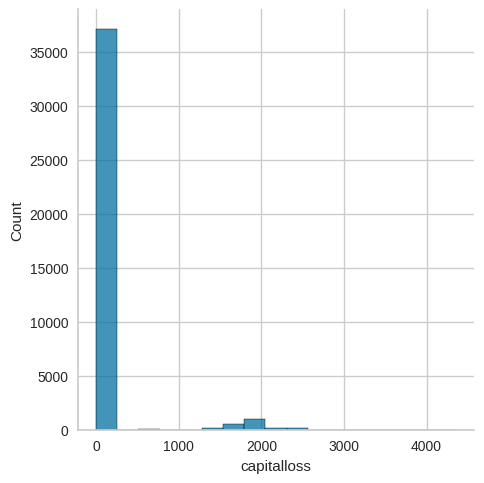

<Figure size 2000x1000 with 0 Axes>

hoursperweek


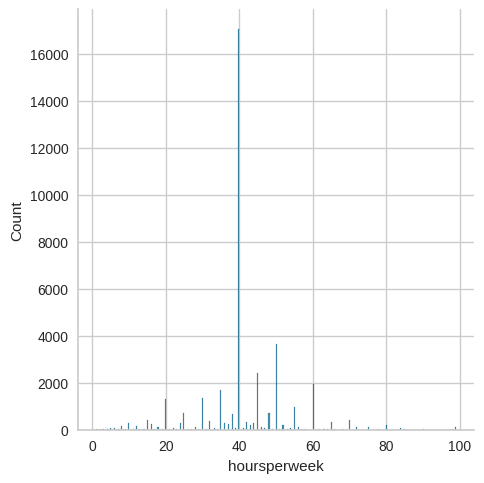

<Figure size 2000x1000 with 0 Axes>

native


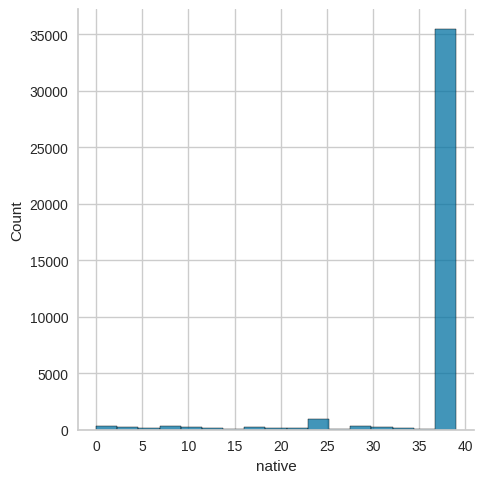

<Figure size 2000x1000 with 0 Axes>

Salary


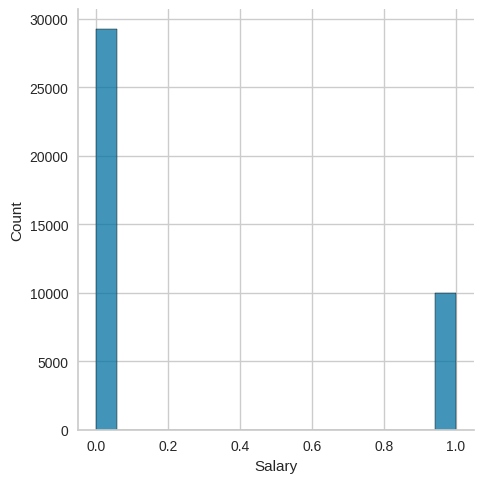

<Figure size 2000x1000 with 0 Axes>

In [30]:
for n in df1.columns:
    print(n)
    sn.displot(df1[n])
    plt.figure(figsize=(20,10))
    plt.show()

<Axes: >

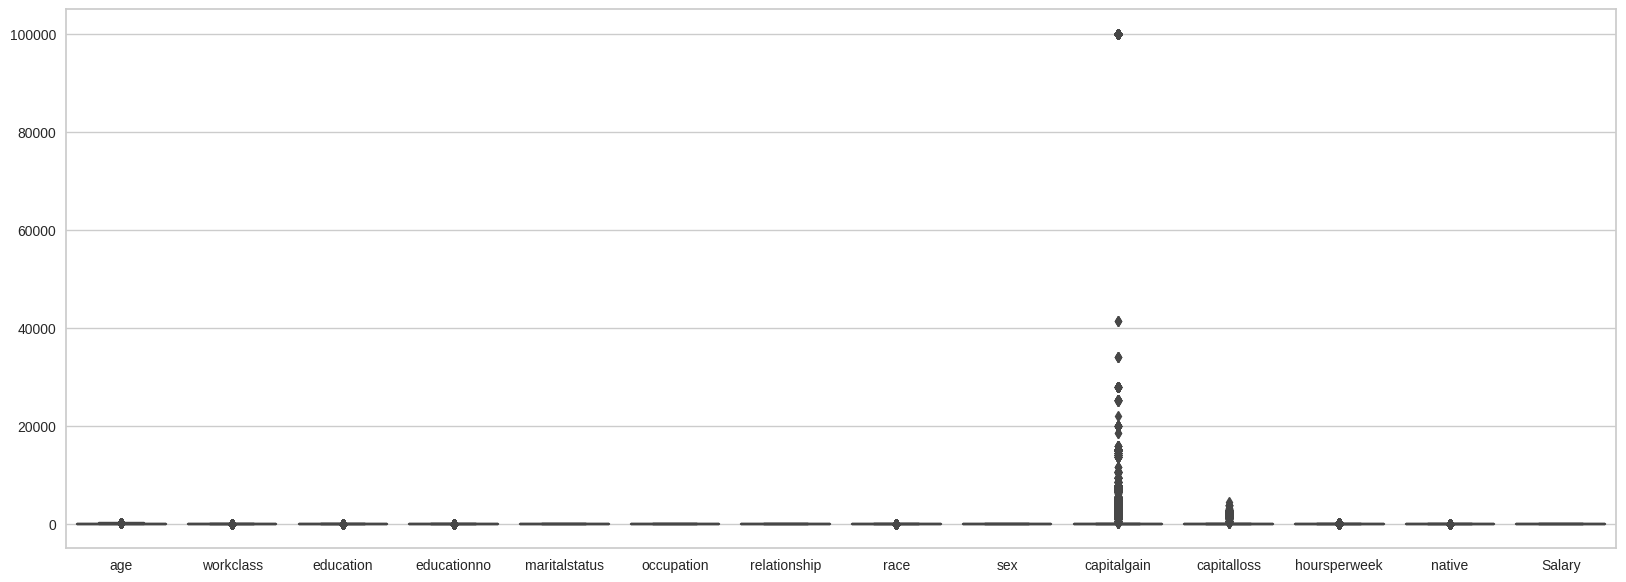

In [31]:
plt.figure(figsize=(20,7))
sn.boxplot(data = df1)

In [32]:
df1.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.079642,0.001807,0.030211,-0.233279,-0.004676,-0.230643,0.044616,0.068483,0.075495,0.049876,0.066927,0.012129,0.214285
workclass,0.079642,1.000000,0.022333,0.041859,-0.031786,0.016217,-0.070247,0.059339,0.075331,0.031985,0.002649,0.047542,0.010469,0.015598
education,0.001807,0.022333,1.000000,0.366443,-0.043411,-0.020636,-0.010764,0.003913,-0.029864,0.035072,0.024082,0.060431,0.075014,0.094952
educationno,0.030211,0.041859,0.366443,1.000000,-0.069475,0.087334,-0.085939,0.033594,0.006596,0.129552,0.082594,0.136030,0.097527,0.329569
maritalstatus,-0.233279,-0.031786,-0.043411,-0.069475,1.000000,0.006666,0.155762,-0.075430,-0.109154,-0.042309,-0.033607,-0.167011,-0.026461,-0.181626
occupation,-0.004676,0.016217,-0.020636,0.087334,0.006666,1.000000,-0.061367,0.008746,0.061054,0.016952,0.010978,0.020983,0.004230,0.049738
relationship,-0.230643,-0.070247,-0.010764,-0.085939,0.155762,-0.061367,1.000000,-0.113604,-0.584810,-0.062712,-0.066390,-0.247737,-0.001036,-0.244911
race,0.044616,0.059339,0.003913,0.033594,-0.075430,0.008746,-0.113604,1.000000,0.085235,0.021099,0.031794,0.053968,0.116142,0.078779
sex,0.068483,0.075331,-0.029864,0.006596,-0.109154,0.061054,-0.584810,0.085235,1.000000,0.052882,0.053687,0.226747,-0.010639,0.212912
capitalgain,0.075495,0.031985,0.035072,0.129552,-0.042309,0.016952,-0.062712,0.021099,0.052882,1.000000,-0.036791,0.082977,0.012924,0.231529


<Axes: >

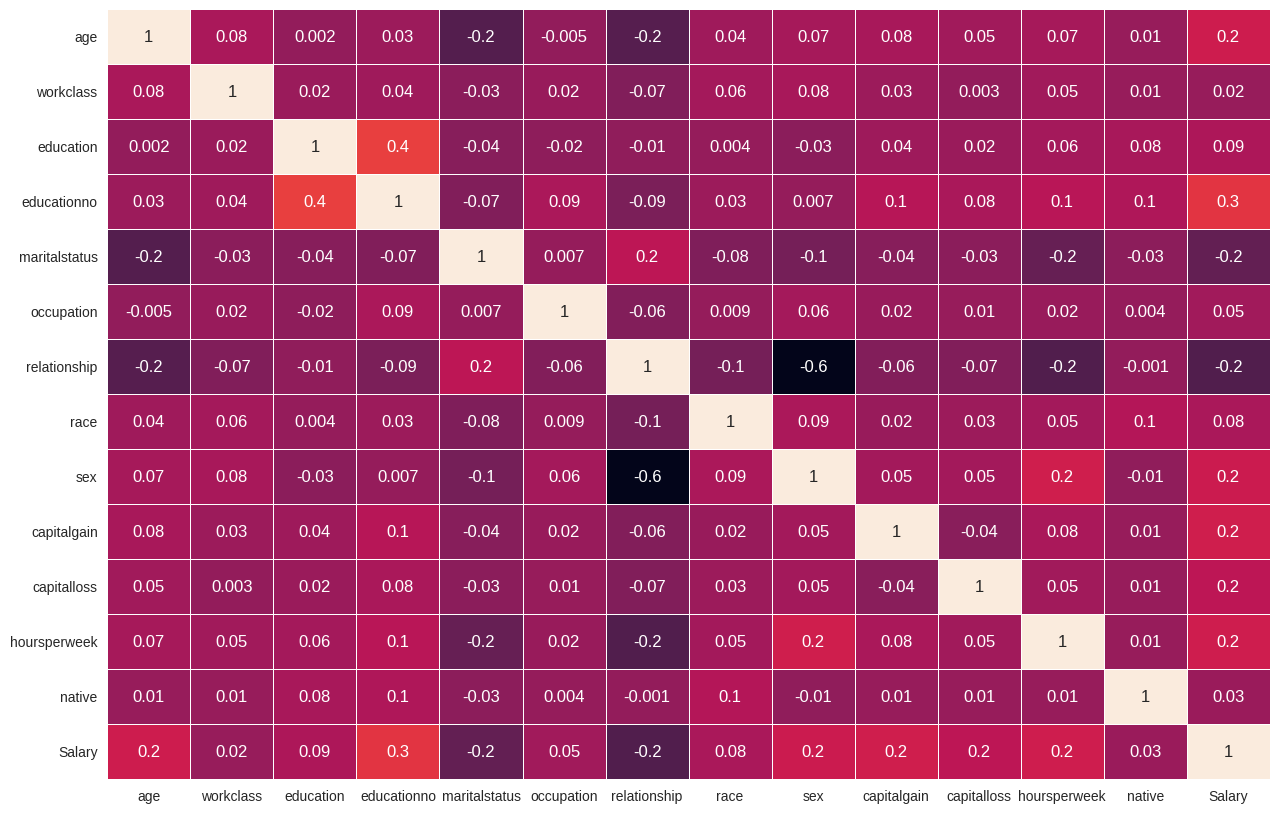

In [33]:
fig,ax = plt.subplots(figsize = (15,10))
sn.heatmap(df1.corr(),annot=True,fmt='.1g',cbar=False,linewidths='0.5')

In [35]:
df1.Salary.value_counts()

0    29264
1     9975
Name: Salary, dtype: int64

Text(0.5, 1.0, 'Salary Division')

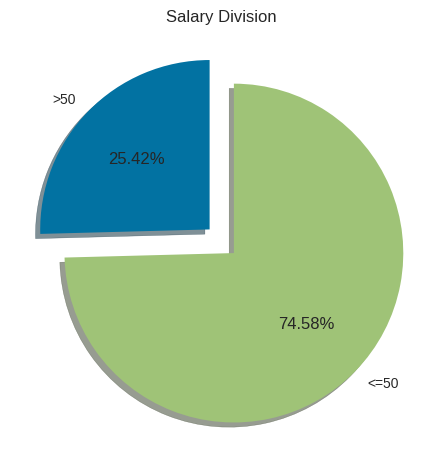

In [36]:
labels =['>50','<=50']
sizes = [9975,29264]
plt.pie(sizes,labels=labels,startangle=90,shadow=True,
       explode= (0.1,0.1),autopct ='%1.2f%%')
plt.title('Salary Division')


In [37]:
# since we can say our depedent varaible has imbalance we need to balance the data

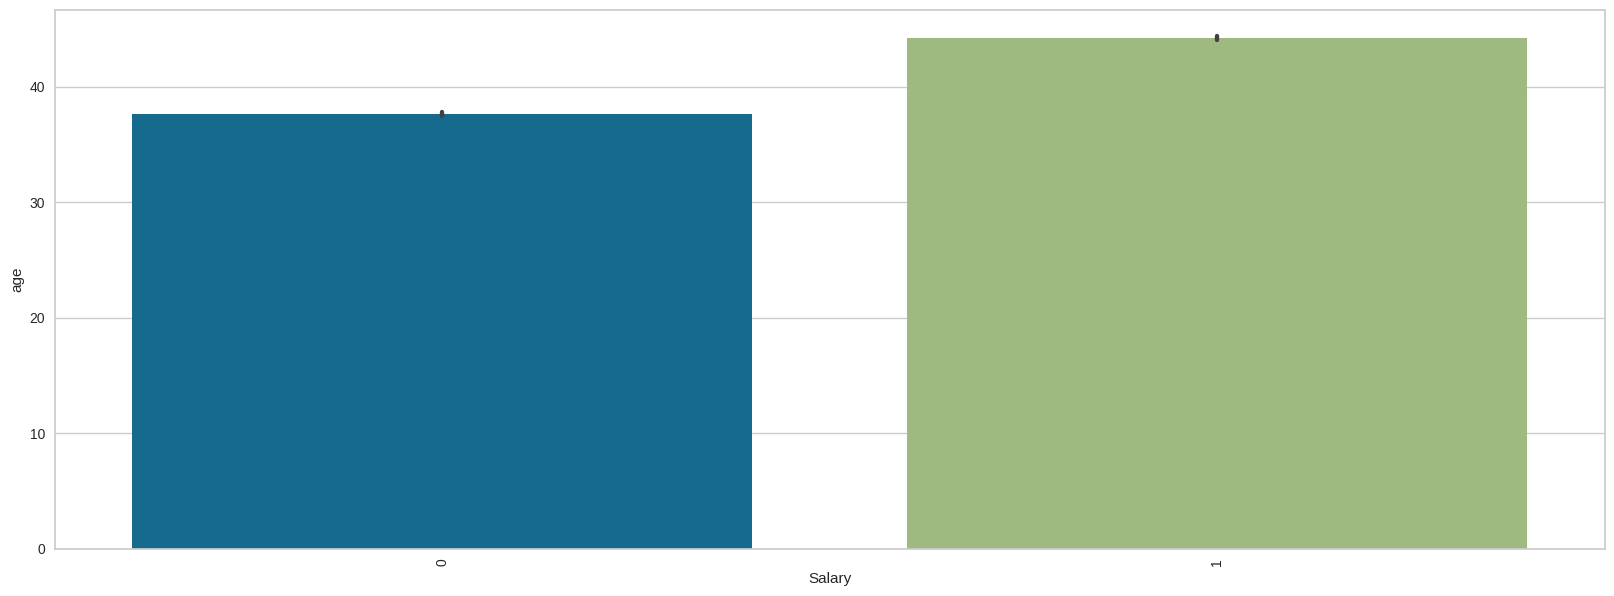

In [38]:
plt.figure(figsize=(20,7))
Age = df1[['Salary','age']].sort_values('age',ascending=False)
ax = sn.barplot(x = 'Salary',y = 'age',data = Age)
ax.set(xlabel = 'Salary',ylabel = 'age')
plt.xticks(rotation = 90)
plt.show()

In [39]:
## with intuition we can say approximately people age <=35 earn less than 50K

In [40]:
df.education.value_counts()

 HS-grad         12003
 Some-college     8456
 Bachelors        6522
 Masters          2357
 Assoc-voc        1859
 Assoc-acdm       1470
 11th             1422
 10th             1136
 7th-8th           801
 Prof-school       764
 9th               658
 12th              540
 Doctorate         526
 5th-6th           438
 1st-4th           217
 Preschool          70
Name: education, dtype: int64

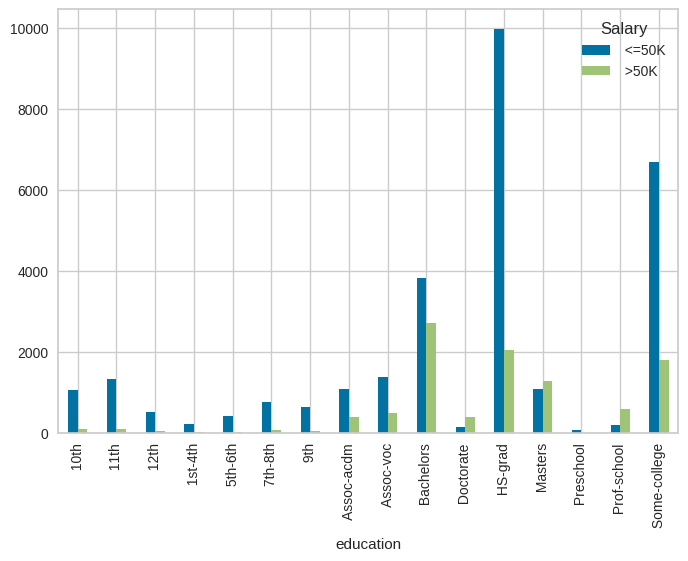

In [41]:
pd.crosstab(df.education,df.Salary).plot(kind = 'bar')
plt.show()

In [42]:
## as we can see the preschool have the lowest salary,
##while with masters,doctorate and prof-school are having salary >50 ##

In [43]:
df.sex.value_counts()

 Male      26097
 Female    13142
Name: sex, dtype: int64

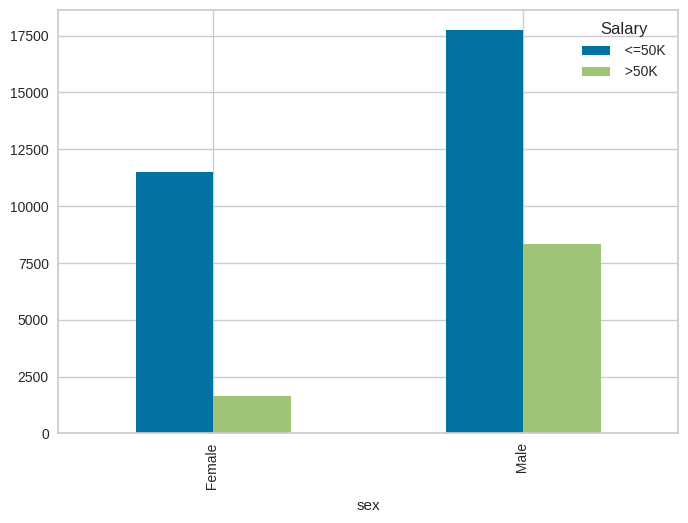

In [44]:
pd.crosstab(df.sex,df.Salary).plot(kind = 'bar')
plt.show()

In [45]:
df.educationno.value_counts()

9     12003
10     8456
13     6522
14     2357
11     1859
12     1470
7      1422
6      1136
4       801
15      764
5       658
8       540
16      526
3       438
2       217
1        70
Name: educationno, dtype: int64

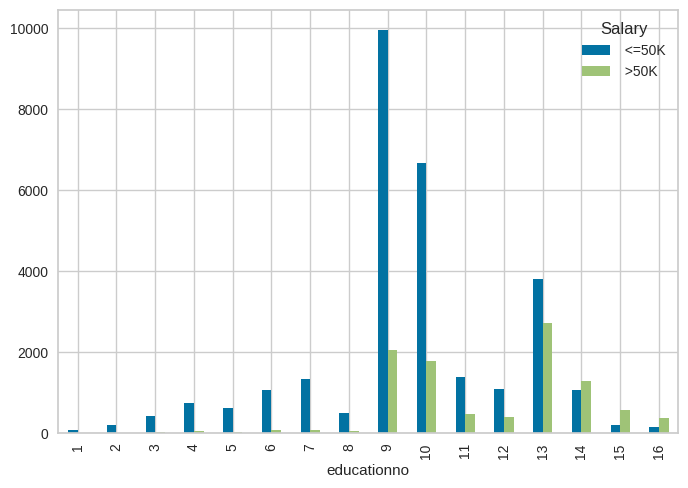

In [46]:
pd.crosstab(df.educationno,df.Salary).plot(kind = 'bar')
plt.show()

In [47]:
## its very evidently visible that low number of educationno have salary less than <50 and
#higher the number higher the salary##

<Axes: >

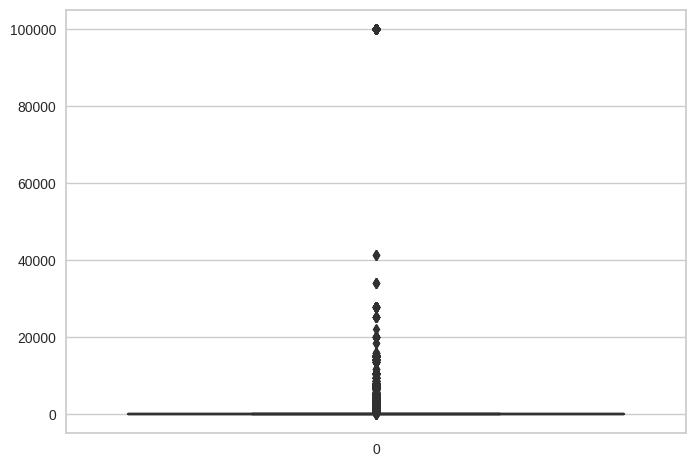

In [48]:
sn.boxplot(df1['capitalgain'])

In [49]:
ul = df1['capitalgain'].quantile(0.99)
ll = df1['capitalgain'].quantile(0.01)

print(ul,ll)

15024.0 0.0


In [50]:
df2 = df1[(df1['capitalgain']<=15024)&(df1['capitalgain']>0)]

<Axes: >

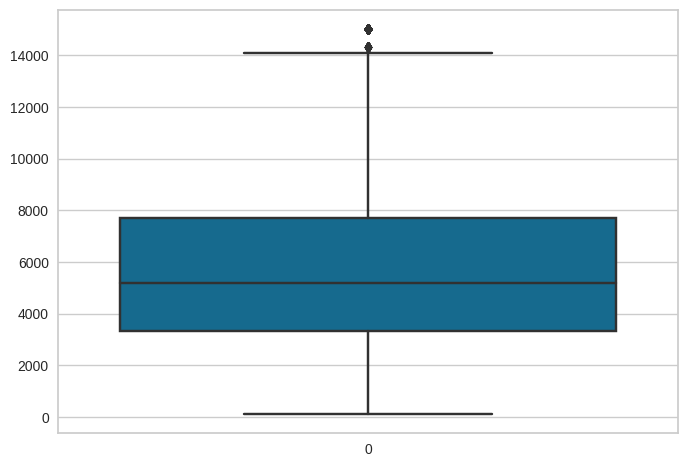

In [51]:
sn.boxplot(df2['capitalgain'])

In [52]:
df1['capitalgain'] = np.where(df1['capitalgain']>= ul,
                             ul,
                             np.where(df1['capitalgain']<=ll,
                                     ll,
                                     df1['capitalgain']))

<Axes: >

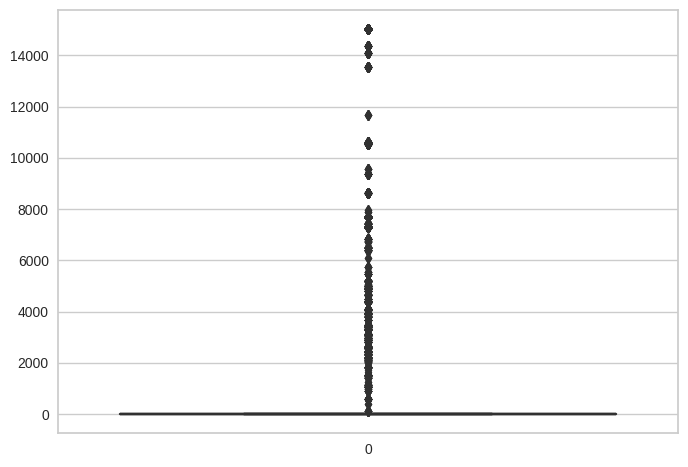

In [53]:
sn.boxplot(df1['capitalgain'])

<Axes: >

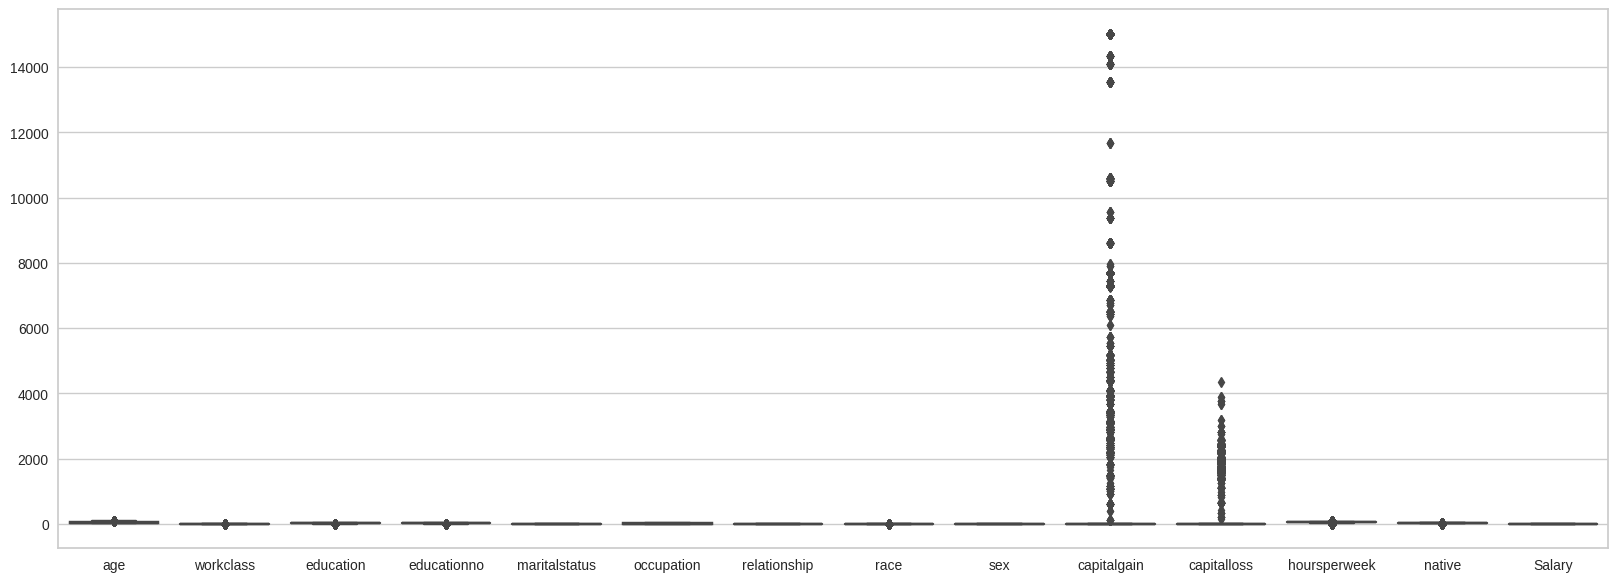

In [54]:
plt.figure(figsize=(20,7))
sn.boxplot(data = df1)

In [55]:
## as the distance form outliers are minimal we have treated outlier well for capital gain ##


<Axes: >

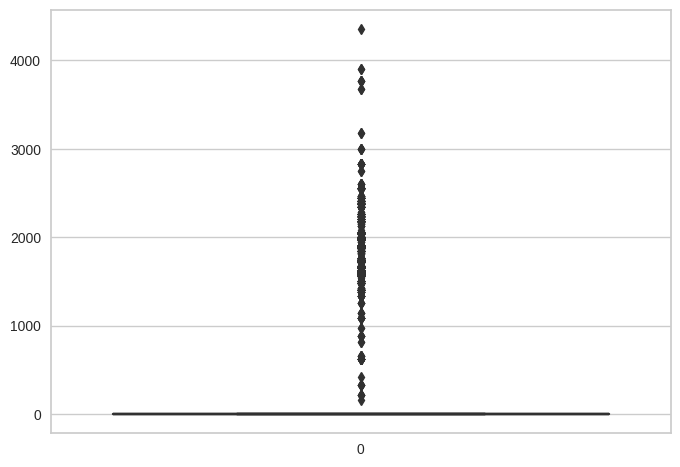

In [56]:
sn.boxplot(df1['capitalloss'])

In [57]:
df1.shape

(39239, 14)

In [58]:
X = df1.iloc[:,0:13]
y = df1.iloc[:,13]

In [59]:
std = StandardScaler()
df_scaled = std.fit_transform(X)
df_scaled

array([[-0.02326754,  2.74336382, -0.31240583, ..., -0.23465538,
        -0.09681487,  0.28415699],
       [ 0.80392517,  1.75342578, -0.31240583, ..., -0.23465538,
        -2.26409357,  0.28415699],
       [-0.09846688, -0.22645031,  0.2027651 , ..., -0.23465538,
        -0.09681487,  0.28415699],
       ...,
       [-0.02326754, -0.22645031, -0.31240583, ..., -0.23465538,
        -0.41789319,  0.28415699],
       [ 0.35272914, -0.22645031, -0.31240583, ..., -0.23465538,
        -0.09681487,  0.28415699],
       [-0.32406489,  0.76348773, -0.31240583, ..., -0.23465538,
         1.50857677,  0.28415699]])

In [60]:
X = df_scaled


In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [63]:
svc_lin=SVC(kernel='linear')
svm_rfe_model=RFE(estimator=svc_lin)
svm_rfe_model_fit=svm_rfe_model.fit(X_train,y_train)

In [64]:
svm_rfe_model_fit.n_features_

6

In [65]:
svm_rfe_model_fit.ranking_

array([1, 4, 5, 1, 2, 8, 3, 6, 1, 1, 1, 1, 7])

In [66]:
svm_rfe_model_fit.support_

array([ True, False, False,  True, False, False, False, False,  True,
        True,  True,  True, False])

In [67]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174.0,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0.0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0.0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0.0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0.0,0,40,4,0


In [68]:
for i,col in zip(range(X.shape[1]),X):
    print(f"{col} selected = {svm_rfe_model_fit.support_[i]} rank = {svm_rfe_model_fit.ranking_[i]}")

[-0.02326754  2.74336382 -0.31240583  1.08589165  0.93061066 -1.51156384
 -0.27908769  0.41127027  0.70963567  0.5359279  -0.23465538 -0.09681487
  0.28415699] selected = True rank = 1
[ 0.80392517  1.75342578 -0.31240583  1.08589165 -0.36968602 -0.76524742
 -0.89713171  0.41127027  0.70963567 -0.27141929 -0.23465538 -2.26409357
  0.28415699] selected = False rank = 4
[-0.09846688 -0.22645031  0.2027651  -0.43087196 -1.66998271 -0.26770314
 -0.27908769  0.41127027  0.70963567 -0.27141929 -0.23465538 -0.09681487
  0.28415699] selected = False rank = 5
[ 1.02952318 -0.22645031 -2.37308953 -1.18925376 -0.36968602 -0.26770314
 -0.89713171 -1.86679778  0.70963567 -0.27141929 -0.23465538 -0.09681487
  0.28415699] selected = True rank = 1
[-0.85046025 -0.22645031 -0.31240583  1.08589165 -0.36968602  0.72738542
  2.19308838 -1.86679778 -1.4091738  -0.27141929 -0.23465538 -0.09681487
 -4.93389867] selected = False rank = 2
[-0.17366622 -0.22645031  0.46035056  1.46508256 -0.36968602 -0.76524742

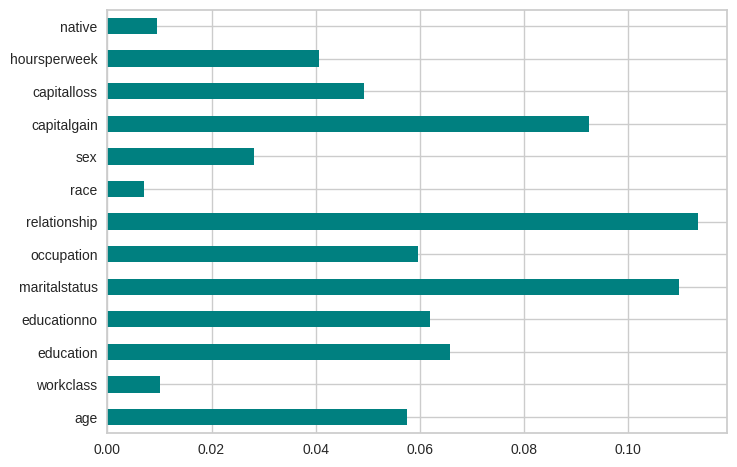

In [69]:
#checking through importance plot for selection of coloumns
importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances,df1.columns[0:len(df1.columns)-1])
feat_importances.plot(kind = 'barh',color ='teal')
plt.show()


In [88]:
df2 = df1[["age","education","maritalstatus","relationship","capitalgain","occupation","Salary"]]

In [89]:
df2.head()

,age,education,maritalstatus,relationship,capitalgain,occupation,Salary
0,39,9,4,1,2174.0,0,0
1,50,9,2,0,0.0,3,0
2,38,11,0,1,0.0,5,0
3,53,1,2,0,0.0,5,0
4,28,9,2,5,0.0,9,0


In [90]:
array = df2.values
X1 = array[:,0:6]
y1 = array [:,6]

In [91]:
X1,y1 = make_classification(n_samples=20000,n_features=7,n_informative=5,n_redundant=2,
                          n_repeated=0,n_classes=2,n_clusters_per_class=1,random_state=0 )

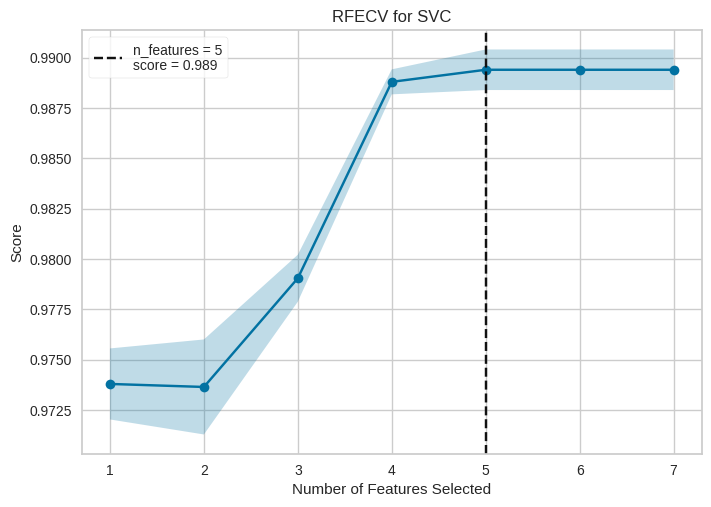

<Axes: title={'center': 'RFECV for SVC'}, xlabel='Number of Features Selected', ylabel='Score'>

In [92]:
visualizer = RFECV(SVC(kernel='linear',C=1))
visualizer.fit(X1,y1,)
visualizer.show()

In [93]:
df2.head()

,age,education,maritalstatus,relationship,capitalgain,occupation,Salary
0,39,9,4,1,2174.0,0,0
1,50,9,2,0,0.0,3,0
2,38,11,0,1,0.0,5,0
3,53,1,2,0,0.0,5,0
4,28,9,2,5,0.0,9,0


In [98]:
df2['Salary'].value_counts()

0    29264
1     9975
Name: Salary, dtype: int64

In [99]:
X2 = df2.iloc[:,0:6]
y2 = df2.iloc[:,6]

In [100]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.20)

In [101]:
print('Training Features Shape:', X2_train.shape)
print('Training Labels Shape:', X2_test.shape)
print('Testing Features Shape:', y2_train.shape)
print('Testing Labels Shape:', y2_test.shape)

Training Features Shape: (31391, 6)
Training Labels Shape: (7848, 6)
Testing Features Shape: (31391,)
Testing Labels Shape: (7848,)


In [102]:
smk = SMOTETomek(n_jobs=-1,sampling_strategy='minority')
X2_res,y2_res = smk.fit_resample(X2_train,y2_train)

In [103]:
print(X2_res.shape,y2_res.shape)

(46544, 6) (46544,)


In [104]:
print('original dataset shape {}'.format(Counter(y2)))
print('resamples dataset shape {}'.format(Counter(y2_res)))

original dataset shape Counter({0: 29264, 1: 9975})
resamples dataset shape Counter({0: 23272, 1: 23272})


In [105]:
std = StandardScaler()
df_scaled2 = std.fit_transform(X2_res)
df_scaled2

array([[-1.01853125,  1.28583668,  1.18945142, -0.1201674 , -0.35418445,
        -0.7928215 ],
       [ 0.97360378, -1.23121688,  1.18945142, -0.1201674 , -0.35418445,
         0.46350536],
       [ 0.49549137,  0.16714621, -0.28926935, -0.73438564, -0.35418445,
         1.21730148],
       ...,
       [ 0.17674977, -0.39219902, -0.28926935, -0.73438564,  0.51041302,
        -1.54661762],
       [-0.69978965, -0.39219902, -0.28926935, -0.73438564, -0.35418445,
        -0.29029075],
       [ 1.05328918,  0.16714621, -0.28926935, -0.73438564, -0.35418445,
         1.21730148]])

In [106]:
X2_res = df_scaled2

In [107]:
X2_res_train,X2_res_test,y2_res_train,y2_res_test = train_test_split(X2_res,y2_res,test_size=0.4)

In [108]:
print('Training Features Shape:', X2_res_train.shape)
print('Training Labels Shape:', X2_res_test.shape)
print('Testing Features Shape:', y2_res_train.shape)
print('Testing Labels Shape:', y2_res_test.shape)

Training Features Shape: (27926, 6)
Training Labels Shape: (18618, 6)
Testing Features Shape: (27926,)
Testing Labels Shape: (18618,)


In [109]:
clf = SVC()

In [110]:
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]

In [111]:
rsv = RandomizedSearchCV(clf,param_grid,cv=10,verbose=100,n_jobs=1)

In [112]:
rsv.fit(X2_res_train,y2_res_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=0.1, gamma=0.1, kernel=rbf..............................
[CV 1/10; 1/10] END C=0.1, gamma=0.1, kernel=rbf;, score=0.791 total time=  22.2s
[CV 2/10; 1/10] START C=0.1, gamma=0.1, kernel=rbf..............................
[CV 2/10; 1/10] END C=0.1, gamma=0.1, kernel=rbf;, score=0.785 total time=  22.3s
[CV 3/10; 1/10] START C=0.1, gamma=0.1, kernel=rbf..............................
[CV 3/10; 1/10] END C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=  21.1s
[CV 4/10; 1/10] START C=0.1, gamma=0.1, kernel=rbf..............................
[CV 4/10; 1/10] END C=0.1, gamma=0.1, kernel=rbf;, score=0.790 total time=  23.0s
[CV 5/10; 1/10] START C=0.1, gamma=0.1, kernel=rbf..............................
[CV 5/10; 1/10] END C=0.1, gamma=0.1, kernel=rbf;, score=0.796 total time=  22.2s
[CV 6/10; 1/10] START C=0.1, gamma=0.1, kernel=rbf..............................
[CV 6/10; 1/10] END C=0.1, gamma=0.1, ker

RandomizedSearchCV(cv=10, estimator=SVC(), n_jobs=1,
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf']}],
                   verbose=100)

In [113]:
rsv.best_params_,rsv.best_score_

({'kernel': 'rbf', 'gamma': 0.5, 'C': 10}, 0.8157637877953172)

In [114]:
clf2 = SVC(kernel='rbf',C=10,gamma=0.1)
clf2.fit(X2_res_train,y2_res_train)

SVC(C=10, gamma=0.1)

In [115]:
y_pred = clf2.predict(X2_res_test)
y_pred

array([1, 1, 0, ..., 1, 1, 1])

In [116]:
print(confusion_matrix(y2_res_test,y_pred))

[[6895 2413]
 [1133 8177]]


In [117]:
print(classification_report(y2_res_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80      9308
           1       0.77      0.88      0.82      9310

    accuracy                           0.81     18618
   macro avg       0.82      0.81      0.81     18618
weighted avg       0.82      0.81      0.81     18618

